In [1]:
import numpy as np
from numpy import sum as arraysum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
df=pd.read_csv("Z:\\Tech Development\\Tech Development projects\\EM-119 Accelerated Stability Temperature Determination for HbA1c Linearity Controls\\Lot 5013\\5013_csv.csv")
df2=pd.read_csv("Z:\\Tech Development\\Tech Development projects\\EM-119 Accelerated Stability Temperature Determination for HbA1c Linearity Controls\\Lot 5013\\5014_csv.csv")


In [7]:
df.head(5)

,Conc,Level,Machine
0,5.22375,1,Trinity
1,6.92750,2,Trinity
2,8.70500,3,Trinity
3,10.46500,4,Trinity
4,12.25875,5,Trinity


<Figure size 864x576 with 0 Axes>

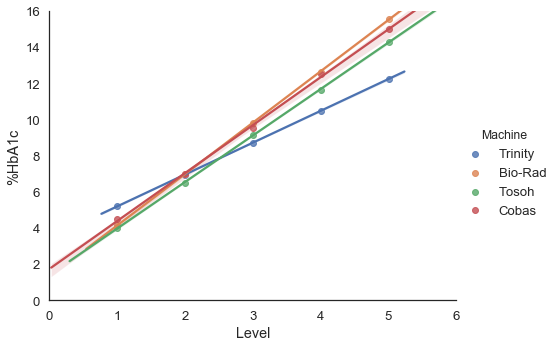

In [19]:
sns.set(font_scale=1.2)
sns.set_style('white')
ax=plt.figure(figsize=(12,8))
ax=sns.lmplot(x='Level', y= 'Conc', data=df, hue='Machine', aspect=11/8, fit_reg = True)
ax=plt.gca()
ax.set(xlabel = 'Level', ylabel = '%HbA1c', ylim=(0,16), xlim=(0,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("Std Curve5013")
plt.rcParams["axes.labelsize"] = 24
plt.show();

<Figure size 864x576 with 0 Axes>

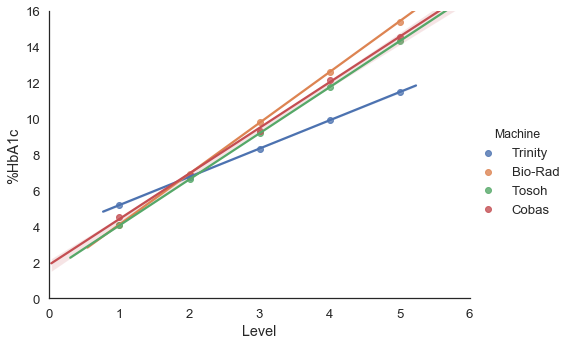

In [21]:
df1 = df[(df.Machine == 'Trinity')]
sns.set(font_scale=1.2)
sns.set_style('white')
corr = pearsonr(df1['Level'], df1['Conc'])
corr = [np.round(c, 4) for c in corr]
ax=plt.figure(figsize=(12,8))
ax=sns.lmplot(x='Level', y= 'Conc', data=df2, hue='Machine', aspect=11/8, fit_reg = True)
ax=plt.gca()
ax.set(xlabel = 'Level', ylabel = '%HbA1c', ylim=(0,16), xlim=(0,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("Std Curve5014")
plt.rcParams["axes.labelsize"] = 24
plt.show();

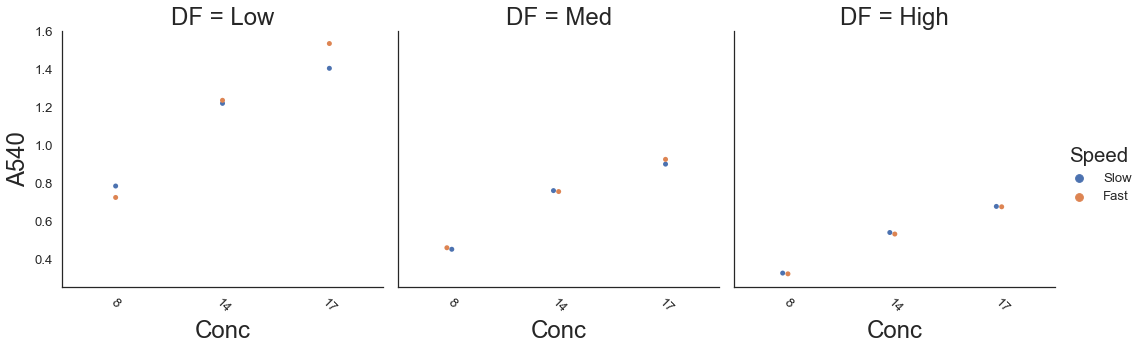

In [6]:
# Factor Plot
g = sns.factorplot(x='Conc', 
                   y='A540', 
                   data=df, 
                   hue='Speed',  # Color by stage
                   col='DF',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45);

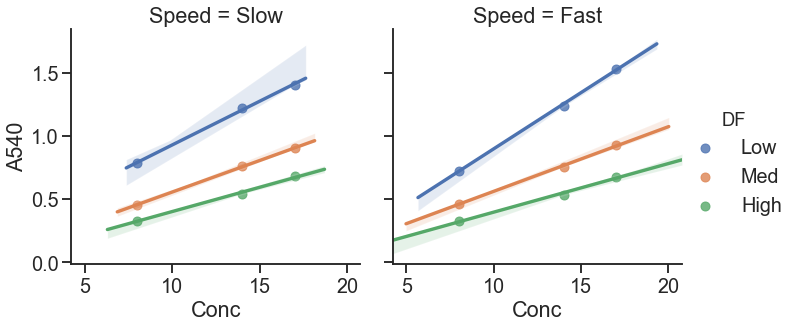

In [7]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.2) 
sns.set_style('ticks')
sns.lmplot(x='Conc', y='A540', data=df,
           fit_reg=True, 
           hue='DF', col='Speed')
plt.savefig("Speed_DilF");

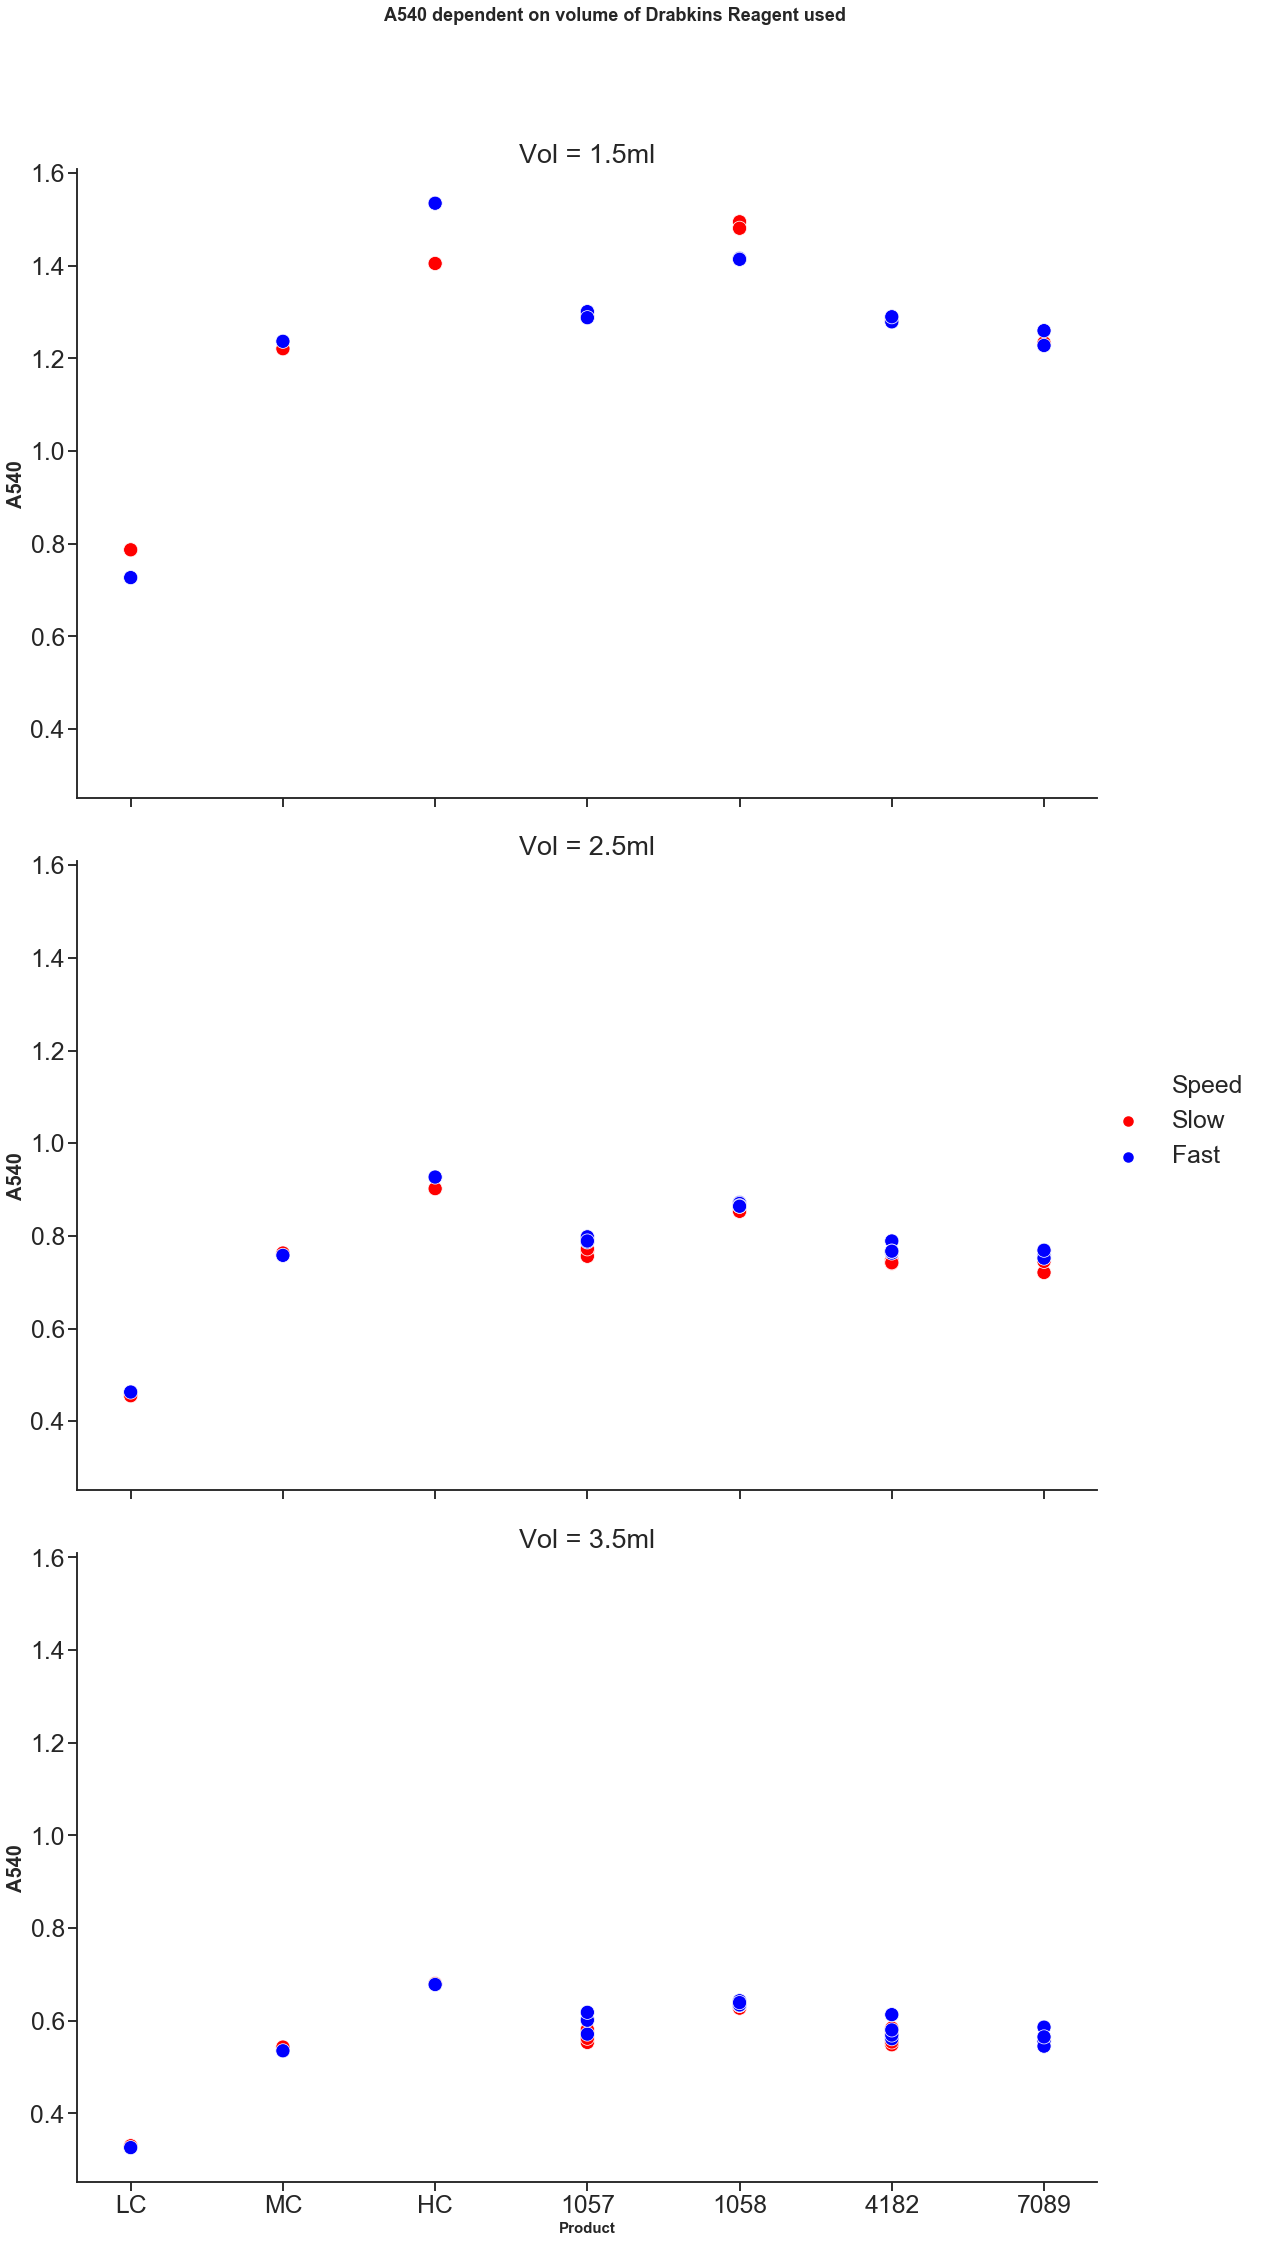

In [20]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.5) 
sns.set_style('ticks')
g = sns.relplot(x='Class', y='A540', hue='Speed', data=df, palette=['red','blue'],s=200,
                row='Vol',  legend='brief',
                height=10, aspect=1.6, sizes=(2000,1500))

g.fig.suptitle('A540 dependent on volume of Drabkins Reagent used' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Product",fontweight='bold', size=15)
g.set_ylabels("A540",fontweight='bold', size=20)
plt.savefig("D3");